# Interpolating Multi-Dimensional Data

In this tutorial, we will be using Kadlu to interpolate multi-dimensional data arrays. In particular, we will show how to interpolate, unstructured bathymetric data using Kadlu's `Interpolator2D` class. 

As always, we begin by importing all necessary modules, classes, functions, etc.

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
from kadlu.geospatial.interpolation import Interpolator2D
from kadlu import chs, era5, hycom, wwiii

For this exersise, we will consider bathymetric data from the Canadian Hydrography Servicethe (CHS) for the geographic region $47^o$N to $49^o$N and $-63^o$W to $-61^o$W:

In [2]:
# load some data to interpolate
bathy, lat, lon = chs().load_bathymetry(
        south=47, west=-63, 
        north=49, east=-61)

Note that the bathymetric data provided by CHS is unstructured, i.e., the data points do not lie on a grid at uniform intervals. This can be seen by making a scatter plot of the latitude-longitude coordinates, as done below

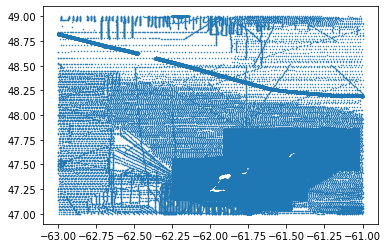

In [3]:
# plot lat-lon coordinates
fig = plt.plot(lon, lat, '.', markersize=1)

In order to interpolate the bathymetric data, we initialize an instance of the `Interpolator2D` class. (Note that Kadlu also has a `Interpolator3D` class for three-dimensional data arrays, such as temperature and salinity, which depend not only on latitude and longitude, but also on depth.)

In [4]:
interpolator = Interpolator2D(values=bathy, lats=lat, lons=lon)  # create interpolator

Now, we can use the interpolator to query for approximate bathymetric values at any set of coordinate pairs. For example, the query

In [5]:
interpolator.interp(lat=[47.5, 48, 48.5], lon=[-62.5, -62, -61.5]) 

array([ -85.97095665,  -60.06990438, -413.        ])

returns the bathymetric values, i.e., the elevation of the seafloor, at the coordinates ($47.5^{\circ}$N,$-62.5^{\circ}$W), ($48.0^{\circ}$N,$-62.0^{\circ}$W) and ($48.5^{\circ}$N,$-61.5^{\circ}$W).

One can also query on a regular coordinate grid, using the grid keyword argument,

In [6]:
interpolator.interp(lat=[47, 47.5, 48, 48.5, 49], lon=[-62.5, -62], grid=True)

array([[ -64.13640905,  -43.45282924],
       [ -85.97095665,  -29.4995005 ],
       [ -74.04101394,  -60.06990438],
       [-393.31712294, -430.1840852 ],
       [-217.78748524,  -40.35289509]])